## Results

### Result for Table

In [1]:
import sys 
from rich import print, pretty
pretty.install()

## EU option

import numpy as np

sys.path.append("..")

In [2]:
from RL_policy import training_sim_data, fitted_lspi_put_option, scoring_sim_data , option_price
from bintree_policy import bin_tree_price

## Import packages for LSM

from LSM_policy import  lsm_price
from eu_opt import european_put_price


In [ ]:
## RL parameters

num_scoring_paths_val: int = 10000
num_steps_scoring: int = 50
num_steps_lspi: int = 10
num_training_paths_lspi_val: int = 5000
spot_price_frac_lspi: float = 0.00000000000000000000000000001
training_iters_lspi_val: int = 4



spot_price_val: float = 36.0
strike_val: float = 40.0
expiry_val: float = 1.0
rate_val: float = 0.06
vol_val: float = 0.2



num_steps_value_lsm = 50 
num_paths_train_val = 100000
K_value = 40
k_value = 4
num_paths_test_val = 10000

S0_values_table1 = np.array([36,38,40,42, 44])
sd_values_table1 = np.array([0.2, 0.4])
T_values_table1 = np.array([1,2])

eu_price_list =[]
bin_price_list = []
lsm_price_list = []
rl_price_list = []
S0_list = []
vol_list = []
T_list = []

In [ ]:
## Small Text on numbe rof iteration
T_table1_test = 1
S0_table1_test = 36
sd_table1_test = 0.2
training_iters_lspi_val_test = 3

fited_lspi = fitted_lspi_put_option(expiry=T_table1_test,
                                    num_steps=num_steps_lspi,
                                    num_paths=num_training_paths_lspi_val,
                                    spot_price=S0_table1_test,
                                    spot_price_frac=spot_price_frac_lspi,
                                    rate=rate_val,vol=sd_table1_test,
                                    strike=strike_val,
                                    training_iters=training_iters_lspi_val_test)

test_data = scoring_sim_data(expiry=T_table1_test, 
                                                          num_steps=num_steps_scoring, num_paths=20000,
                                                          spot_price=S0_table1_test, rate=rate_val, vol=sd_table1_test)

price_RL, stop_time = option_price(test_data, fited_lspi, expiry=T_table1_test,
                                        rate=rate_val,strike=strike_val)
                            

print(f"Average Option Price: {price_RL}")

In [ ]:
print("%-10s %-10s %-10s %-20s %-20s %-20s %-20s" 
                          %("S0","vol", "T", "EU", "Bin Tree", "LSM", "RL"))
for S0_table1 in S0_values_table1:
      for sd_table1 in sd_values_table1:
            for T_table1 in T_values_table1:
                     

                    #  eu_price = european_put_price(spot_price=S0_table1, expiry=T_table1, vol=sd_table1,
                    #                                rate=rate_val, strike=strike_val)
                     
                     
                    #  price_bin = bin_tree_price(spot_price_val=S0_table1, strike_val=strike_val,
                    #                      expiry_val=T_table1, rate_val=rate_val, vol_val=sd_table1)
                     

                    #  price_lsm,_ = lsm_price(spot_price_val=S0_table1, strike_val=strike_val,
                    #             expiry_val=T_table1, rate_val=rate_val, vol_val=sd_table1, 
                    #                 steps_value=num_steps_value_lsm,
                    #                 K_value=K_value, k_value=k_value, num_paths_train_val=num_paths_train_val,
                    #                 num_paths_test_val=num_paths_test_val)
                     

                     fited_lspi = fitted_lspi_put_option(expiry=T_table1,
                                    num_steps=num_steps_lspi,
                                    num_paths=num_training_paths_lspi_val,
                                    spot_price=S0_table1,
                                    spot_price_frac=spot_price_frac_lspi,
                                    rate=rate_val,vol=sd_table1,
                                    strike=strike_val,
                                    training_iters=training_iters_lspi_val)
                        
                     option_prices = []

                     for _ in range(20):
                             
                             test_data = scoring_sim_data(expiry=T_table1, 
                                                          num_steps=num_steps_scoring, num_paths=5000,
                                                          spot_price=S0_table1, rate=rate_val, vol=sd_table1)

                             price_RL, stop_time = option_price(test_data, fited_lspi, 
                                                                expiry=T_table1,
                                        rate=rate_val,
                                        strike=strike_val)
                            
                             option_prices.append(price_RL)
                             #print(f"Average Option Price: {price_RL}")

                      
                     price_rl = np.mean(option_prices)
                     print(f"Average Option Price: {price_RL}")     
                    #  eu_price_list.append(eu_price)
                    #  bin_price_list.append(price_bin)
                    #  lsm_price_list.append(price_lsm)
                     rl_price_list.append(price_rl)
                     
                     S0_list.append(S0_table1)
                     vol_list.append(sd_table1)
                     T_list. append(T_table1)

                     #print("%d %10.2f %10d %20.3f %20.3f %20.3f %20.3f" 
                     #   %(S0_table1,sd_table1, T_table1, eu_price, 
                     #       price_bin,price_lsm, price_rl))
                     
                     #print("%d %10.2f %10d %20.3f" 
                     #   %(S0_table1,sd_table1, T_table1, price_rl))

#np.save('dataRL.npy', np.array(rl_price_list))




In [ ]:
import numpy as np

# Load the npy file
data = np.load('dataRL_Table1.npy')

# Set the print options to three-digit accuracy
np.set_printoptions(precision=3)

# Print the data
print(data)


### Decision Boundary Curve

In [ ]:
num_scoring_paths_val: int = 10000
num_steps_scoring: int = 50
num_steps_lspi: int = 10
num_training_paths_lspi_val: int = 5000
spot_price_frac_lspi: float = 0.00000000000000000000000000001
training_iters_lspi_val: int = 3

spot_price_val: float = 36.0
strike_val: float = 40.0
expiry_val: float = 1.0
rate_val: float = 0.06
vol_val: float = 0.2

In [ ]:
fited_lspi = fitted_lspi_put_option(expiry=expiry_val,
                                    num_steps=num_steps_lspi,
                                    num_paths=num_training_paths_lspi_val,
                                    spot_price=spot_price_val,
                                    spot_price_frac=spot_price_frac_lspi,
                                    rate=rate_val,vol=vol_val,
                                    strike=strike_val,
                                    training_iters=training_iters_lspi_val)

In [ ]:
from helper import continuation_curve_lsm, put_option_exercise_boundary
from LSM_policy import OptimalExerciseLSM


In [ ]:
print("Fitted LSPI Model")

rl_bound_x, rl_bound_y = put_option_exercise_boundary(
        func=fited_lspi,
        expiry=expiry_val,
        num_steps=num_steps_scoring,
        strike=strike_val
    )


In [ ]:
from LSM_policy import OptimalExerciseLSM


num_paths_train_lsm = 10000
num_steps_value_lsm = 50 


def payoff_func(_: float, s: float) -> float:
            return max(K_value - s, 0.)


lsmclass = OptimalExerciseLSM(spot_price=spot_price_val,
                 payoff=payoff_func, expiry=expiry_val,
                 rate=rate_val, vol=vol_val,
                 num_steps=num_steps_value_lsm)

train_data_v = lsmclass.GBMprice_training(num_paths_train=num_paths_train_lsm, seed_random=False)

lsm_policy_coef_beta = lsmclass.train_LSM(training_data=train_data_v,
                            num_paths_train=num_paths_train_lsm, 
                            K=K_value, k=k_value)
    
print("Fitted LSM Model")


lsm_bound_x, lsm_bound_y = continuation_curve_lsm(
                    left_price=20,right_price=40, 
                    deltaprice=0.1, 
                    lsm_policy_coef=lsm_policy_coef_beta, 
                    K_value=K_value, expiry_val=expiry_val, 
                    num_steps_value_lsm= num_steps_value_lsm
    )

In [ ]:
from bintree_policy import bin_tree_price

In [ ]:
binomial_price, bin_bound_x,bin_bound_y = bin_tree_price(spot_price_val=spot_price_val, 
                                                         strike_val=strike_val, 
                                                         expiry_val=expiry_val, 
                                                         rate_val= rate_val, vol_val=vol_val)

In [ ]:
X_price_ratio= np.concatenate((np.array(rl_bound_x), np.array(lsm_bound_x), np.array(bin_bound_x)))

Y_boundary_price = np.concatenate((np.array(rl_bound_y), np.array(lsm_bound_y), np.array(bin_bound_y)))

In [ ]:
# Set the figure size
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use('ggplot')

# Plotting the data as a line with thicker lines
plt.plot(rl_bound_x, rl_bound_y, color='red', label='RL', linewidth=2)
plt.plot(lsm_bound_x, lsm_bound_y, color='blue', label='LSM', linewidth=2)
plt.plot(bin_bound_x, bin_bound_y, color='green', label='BOPM', linewidth=2)

# Adding labels and title with smaller font size
plt.xlabel('Time (t/Expiry)', fontsize=10, color='black')
plt.ylabel('Underlying Asset Price', fontsize=10, color='black')
plt.title('Boundary Curves vs. Price', fontsize=12)

# Adding legend with smaller font size
plt.legend(fontsize=10)

# Set the x and y-axis tick label font size and color
plt.tick_params(axis='x', labelsize=8, colors='black')
plt.tick_params(axis='y', labelsize=8, colors='black')

# Set the figure resolution
#plt.savefig('../PaperII/Figs/boundary_gbm.png', dpi=300)

# Display the plot
plt.show()


## Frequency Plots

In [ ]:
from RL_policy import training_sim_data, fitted_lspi_put_option, scoring_sim_data , option_price


In [ ]:

num_scoring_paths_val: int = 10000
num_steps_scoring: int = 50
num_steps_lspi: int = 10
num_training_paths_lspi_val: int = 5000
spot_price_frac_lspi: float = 0.00000000000000000000000000001
training_iters_lspi_val: int = 4

spot_price_val: float = 36.0
strike_val: float = 40.0
expiry_val: float = 1.0
rate_val: float = 0.06
vol_val: float = 0.2


fited_lspi = fitted_lspi_put_option(expiry=expiry_val,
                                    num_steps=num_steps_lspi,
                                    num_paths=num_training_paths_lspi_val,
                                    spot_price=spot_price_val,
                                    spot_price_frac=spot_price_frac_lspi,
                                    rate=rate_val,vol=vol_val,
                                    strike=strike_val,
                                    training_iters=training_iters_lspi_val)


scoring_data_rl = scoring_sim_data(expiry=expiry_val,
                                    num_steps=num_steps_scoring,
                                    num_paths=num_scoring_paths_val,
                                    spot_price=spot_price_val,
                                    rate=rate_val, vol=vol_val)


option_price, stoptimes_rl = option_price(scoring_data_rl, fited_lspi,
                                        expiry=expiry_val,
                                        rate=rate_val,
                                        strike=strike_val)

In [ ]:
from LSM_policy import OptimalExerciseLSM


num_paths_train_lsm = 10000
num_steps_value_lsm = 50 

num_steps_value_lsm = 50 
num_paths_train_val = 100000
K_value = 40
k_value = 4
num_paths_test_val = 10000

def payoff_func(_: float, s: float) -> float:
            return max(K_value - s, 0.)


lsmclass = OptimalExerciseLSM(spot_price=spot_price_val,
                 payoff=payoff_func, expiry=expiry_val,
                 rate=rate_val, vol=vol_val,
                 num_steps=num_steps_value_lsm)

train_data_v = lsmclass.GBMprice_training(num_paths_train=num_paths_train_lsm, seed_random=False)

lsm_policy_coef_beta = lsmclass.train_LSM(training_data=train_data_v,
                            num_paths_train=num_paths_train_lsm, 
                            K=K_value, k=k_value)


scoring_data_lsm = lsmclass.scoring_sim_data(num_paths_test=num_paths_test_val)

Option_price, stoptimes_lsm = lsmclass.option_price(scoring_data=scoring_data_lsm,
                                                    Beta_list=lsm_policy_coef_beta,
                                                    k=k_value)

In [ ]:
print(stoptimes_rl)
print(stoptimes_lsm)

In [ ]:
chart1_dataset1 = pd.DataFrame({"RL (LSPI)":stoptimes_rl,
                                "LSM":stoptimes_lsm})


chart_1_dataset_melted1 = pd.melt(chart1_dataset1, value_vars=["RL (LSPI)", "LSM"],
                                                            var_name="Method",
                                                            value_name="stoptime")

#chart_1_dataset_melted1
#from plotnine import ggplot, labs, aes, scale_x_continuous, theme, geom_bar, position_dodge,geom_histogram
from plotnine import *

xx=(ggplot(chart_1_dataset_melted1, aes(x = "stoptime", fill = "Method")) + 
  geom_histogram(position="dodge2", binwidth = 0.5 , center = 0) +
  scale_x_continuous(breaks=range(0, 51, 1)) +
  labs(y='Frequency (from total of 10,000 Paths)', x="The Stopping Time Step (k)") +
  #scale_fill_manual(legend_title,values=c("orange","red")) +
theme(legend_position= (0.8, 0.75),
      axis_text_x=element_text(angle=90),
      text = element_text(size = 7)) +
      ggtitle("S0 = 36, Strike Price = 40, Volatility = 0.2"))
xx


ggsave(self=xx, filename='../PaperII/Figs/rllsmmoves.png', 
       width= 6, height = 4, dpi = 300)


In [ ]:
from RL_policy import training_sim_data, fitted_lspi_put_option, scoring_sim_data , option_price

In [ ]:

num_scoring_paths_val: int = 10000
num_steps_scoring: int = 50
num_steps_lspi: int = 10
num_training_paths_lspi_val: int = 5000
spot_price_frac_lspi: float = 0.00000000000000000000000000001
training_iters_lspi_val: int = 4

spot_price_val: float = 36.0
strike_val: float = 40.0
expiry_val: float = 1.0
rate_val: float = 0.06
vol_val: float = 0.4


fited_lspi = fitted_lspi_put_option(expiry=expiry_val,
                                    num_steps=num_steps_lspi,
                                    num_paths=num_training_paths_lspi_val,
                                    spot_price=spot_price_val,
                                    spot_price_frac=spot_price_frac_lspi,
                                    rate=rate_val,vol=vol_val,
                                    strike=strike_val,
                                    training_iters=training_iters_lspi_val)


scoring_data_rl = scoring_sim_data(expiry=expiry_val,
                                    num_steps=num_steps_scoring,
                                    num_paths=num_scoring_paths_val,
                                    spot_price=spot_price_val,
                                    rate=rate_val, vol=vol_val)


option_price, stoptimes_rl = option_price(scoring_data_rl, fited_lspi,
                                        expiry=expiry_val,
                                        rate=rate_val,
                                        strike=strike_val)


from LSM_policy import OptimalExerciseLSM


num_paths_train_lsm = 10000
num_steps_value_lsm = 50 

num_steps_value_lsm = 50 
num_paths_train_val = 100000
K_value = 40
k_value = 4
num_paths_test_val = 10000

def payoff_func(_: float, s: float) -> float:
            return max(K_value - s, 0.)


lsmclass = OptimalExerciseLSM(spot_price=spot_price_val,
                 payoff=payoff_func, expiry=expiry_val,
                 rate=rate_val, vol=vol_val,
                 num_steps=num_steps_value_lsm)

train_data_v = lsmclass.GBMprice_training(num_paths_train=num_paths_train_lsm, seed_random=False)

lsm_policy_coef_beta = lsmclass.train_LSM(training_data=train_data_v,
                            num_paths_train=num_paths_train_lsm, 
                            K=K_value, k=k_value)

scoring_data_lsm = lsmclass.scoring_sim_data(num_paths_test=num_paths_test_val)

Option_price, stoptimes_lsm = lsmclass.option_price(scoring_data=scoring_data_lsm,
                                                    Beta_list=lsm_policy_coef_beta,
                                                    k=k_value)

In [ ]:
from plotnine import *
import pandas as pd

In [ ]:
chart1_dataset1 = pd.DataFrame({"RL (LSPI)":stoptimes_rl,
                                "LSM":stoptimes_lsm})


chart_1_dataset_melted1 = pd.melt(chart1_dataset1, value_vars=["RL (LSPI)", "LSM"],
                                                            var_name="Method",
                                                            value_name="stoptime")

#chart_1_dataset_melted1
#from plotnine import ggplot, labs, aes, scale_x_continuous, theme, geom_bar, position_dodge,geom_histogram
from plotnine import *

xx=(ggplot(chart_1_dataset_melted1, aes(x = "stoptime", fill = "Method")) + 
  geom_histogram(position="dodge2", binwidth = 0.5 , center = 0) +
  scale_x_continuous(breaks=range(0, 51, 1)) +
  labs(y='Frequency (from total of 10,000 Paths)', x="The Stopping Time Step (k)") +
  #scale_fill_manual(legend_title,values=c("orange","red")) +
theme(legend_position= (0.8, 0.75),
      axis_text_x=element_text(angle=90),
      text = element_text(size = 7)) +
      ggtitle("S0 = 36, Strike Price = 40, Volatility = 0.4"))
xx


ggsave(self=xx, filename='../PaperII/Figs/rllsmmoves04vol.png', 
       width= 6, height = 4, dpi = 300)

In [ ]:
from RL_moves import OptionPricing_RL_move

option_pricing_rl_move = OptionPricing_RL_move(
 num_scoring_paths_val = num_scoring_paths_val,
                 num_training_paths_lspi_val: int,
                 num_steps_lspi_val: int,
                 num_training_iters_lspi_val : int,
                 vol_val: int):
   
)

In [ ]:
from RL_moves import OptionPricing_RL_move

num_paths_test_val = 10000
num_paths_train_val = 5000
num_steps_scoring = 50
training_iters_lspi_val = 5
vol_val = 0.2

option_pricing_rl_move = OptionPricing_RL_move(num_scoring_paths_val=num_paths_test_val,
                                               num_training_paths_lspi_val=num_paths_train_val,
                                               num_steps_lspi_val=10,
                                               num_training_iters_lspi_val=training_iters_lspi_val, 
                                               vol_val=vol_val)

price_ite_02vol, decision_ite_02vol = option_pricing_rl_move.run()




ite_plot =option_pricing_rl_move.clean_and_visualize_iteration_decision(decision_ite_02vol)

ite_plot
#ggsave(self=ite_plot, filename='../', dpi = 600)b


In [ ]:
def clean_and_visualize_iteration_decision(stoptime_rl_iteration):
        df = pd.DataFrame(stoptime_rl_iteration).melt(var_name='IterationNumber', value_name='Values')
        df['Iter'] = pd.Categorical(df['IterationNumber'])

        g = (ggplot(df, aes(x='Values'))
             + geom_histogram(position="dodge2", binwidth=0.5, center=0,  show_legend=False,
                              color='black', fill='red')
             + scale_x_continuous(breaks=range(0, 51, 2))
             + facet_grid('Iter ~ .', scales='fixed') +
 #            + labs(title='Histogram of Exercise Decision Times, at each Iteration of Q-Learning') +
             labs(y='Frequency (from total of 5,000 Paths)', x="The Stopping Time Step (k)") +
                theme(axis_text_x=element_text(size=10, color="black",angle=90),
                text = element_text(size = 10,color='black'),
                axis_text_y=element_text(size=10, color="black")))
               # ggtitle("S0 = 36, Strike Price = 40, Volatility = 0.2"))
        return g

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, scale_x_continuous, facet_grid, labs, \
theme, element_text, ggtitle, scale_y_continuous, geom_bar, ggsave, element_text

ite_plot=clean_and_visualize_iteration_decision(decision_ite_02vol)

ite_plot

In [ ]:
#ite_plot =option_pricing_rl_move.clean_and_visualize_iteration_decision(decision_ite_02vol)

#ite_plot
#ggsave(self=ite_plot, filename='../', dpi = 600)

In [ ]:
from plotnine import ggsave
ggsave(self=ite_plot, filename="../MDPI/Figs/RL_move_GBM_0_2.png", dpi = 300)


In [ ]:
print(price_ite_02vol)


In [ ]:
import pandas as pd

from plotnine import ggplot, aes, geom_histogram, scale_x_continuous, facet_grid, labs, \
theme, element_text, ggtitle, scale_y_continuous, geom_bar, ggsave, element_text

def clean_and_visualize_option_price_value_sepfunc(price_ite):
        
        df = pd.DataFrame({'IterationNumber': list(price_ite.keys()), 
                           'Values': list(price_ite.values())})

        bar_chart = (ggplot(df, aes(x='IterationNumber', y='Values')) +
             geom_bar(stat='identity', fill='red', width = 0.5, color='black') +
            labs(x='Iteration Number', y='Value of the Option (in $)') +
             theme(axis_text_x=element_text(size=10, color="black"),
                text = element_text(size = 10,color='black'),
                axis_text_y=element_text(size=10, color="black")) +
            scale_y_continuous(expand=(0, 0)))
        
        return bar_chart

price_ite_02vol_plot = clean_and_visualize_option_price_value_sepfunc(price_ite_02vol)
price_ite_02vol_plot

In [ ]:
from plotnine import ggsave
ggsave(self=price_ite_02vol_plot, filename="../MDPI/Figs/RL_priceite_GBM_0_2.png", dpi = 300)

## GARCH (1,1) Stochastic Volatility Model

In [3]:
from price_model import Brent_GARCH, BrentGARCHPrice_Light

## Plot Oil Price

In [ ]:
import pandas as pd
Brent_crude_df = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls", 
                        sheet_name="Data 1")

#################################################

# Plot realized volatility and mdel
class_brent = Brent_GARCH(brent_df=Brent_crude_df)
clean_data, _ = class_brent.data_process()
clean_data

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.plot(clean_data["Date"][1:], clean_data["Dollar"][1:] , 'o', markersize=1)

ax.legend(loc="upper left")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.tick_params(axis='x', labelrotation=90, colors='black', labelsize=6)  # Change the font size here
ax.tick_params(axis='y', colors='black')
ax.set_ylabel("Brent Crude Oil Price in ($)",  color='black')
#ax.set_xlabel("Date", color='black', fontsize=8)
ax.set_title("Historical Brent Crude Oil Price", color='black', fontsize=8)
print("Plot Realized Volatility  an Conditional through GARCH(1,1) model")
plt.savefig('../MDPI/Figs/BrentOilPrice.png', dpi=300)
#plt.show()

In [ ]:

plt.style.use('ggplot')
class_brent = Brent_GARCH(brent_df=Brent_crude_df)
#clean_data, _ = class_brent.data_process()
#garch_prices= class_brent.generate_paths(num_time_steps=50, 
#                num_path_numbers=100, initial_price=85, default_param=False)


realized_val, conditional_val = class_brent.compare_model()

fig, ax = plt.subplots()

ax.plot(clean_data["Date"][1:], realized_val, 'o', markersize=1, label="Realized Volatility")
ax.plot(clean_data["Date"][1:], conditional_val, 
                label = "Conditional Volatility, GARCH (1,1) Model")
ax.legend(loc="upper left")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.tick_params(axis='x', labelrotation=90, colors='black', labelsize=6)  # Change the font size here
ax.tick_params(axis='y', colors='black')
ax.set_ylabel(r'Volatility [$\sigma_t$]',  color='black')
#ax.set_xlabel("Date", color='black')
#x.set_xlabel("Date", color='black', fontsize=5)
print("Plot Realized Volatility  an Conditional1 through GARCH(1,1) model")
#plt.show()
#plt.close()

#plt.savefig('../MDPI/Figs/calibration.png', dpi=300)


## Plot the GARCH price and the Oil Price

## Final Policy in GARCH Model

In [4]:
import sys 
from rich import print, pretty
pretty.install()

## EU option

import numpy as np

sys.path.append("..")

from price_model import Brent_GARCH, BrentGARCHPrice_Light
from final_policies_GARCH import OptionPricingRL_GARCH, OptionPricingLSM_GARCH
import pandas as pd

In [5]:
## RL Model
num_scoring_paths_f = 20000
num_train_paths_val = 5000

spot_price_val = 70
strike_val = 80

GARCHRL = OptionPricingRL_GARCH(spot_price=spot_price_val, strike=strike_val, expiry=1, 
                              num_time_steps=50, num_train_paths=num_train_paths_val, 
                              rate=0.06)
Train_data = GARCHRL.generate_garch_rl_training_data()
func_rl = GARCHRL.fitted_lspi_put_option_GARCH(Train_data, training_iters=2)
scoring_data = GARCHRL.generate_garch_rl_scoring_data(num_scoring_paths=num_scoring_paths_f)
final_day_price = GARCHRL.calculate_final_day_price(num_scoring_paths=num_scoring_paths_f)
option_price_rl, stoptime_rl = GARCHRL.option_price(scoring_data, func_rl)

#print("Fitted LSPI Model")
from helper import put_option_exercise_boundary

lspi_x, lspi_y = put_option_exercise_boundary(
        func=func_rl,
        expiry=1,
        num_steps=50,
        strike=strike_val
    )

print(option_price_rl)


10.697283085948616

In [6]:
lspi_x, lspi_y = put_option_exercise_boundary(
        func=func_rl,
        expiry=1,
        num_steps=50,
        strike=strike_val
    )

In [ ]:
print(option_price_rl)
print(final_day_price)

In [ ]:
stoptime_rl

In [20]:
## LSM Model
#spot_price_val = 70.0
#strike_val = 80.0
expiry_val = 1
num_time_steps_val_f = 50
num_train_paths_f = 50000
rate_val = 0.06


option_pricing_lsm = OptionPricingLSM_GARCH(
        spot_price=spot_price_val,
        strike=strike_val,
        expiry=expiry_val,
        num_time_steps=num_time_steps_val_f,
        num_train_paths=num_train_paths_f,
        rate=rate_val
)

training_prices = option_pricing_lsm.generate_prices(num_paths=num_train_paths_f, 
                                                    initial_price=spot_price_val)

lsm_garch_coef = option_pricing_lsm.train_model()


from helper import continuation_curve_lsm
import numpy as np


#lsm_bound_x, lsm_bound_y = continuation_curve_lsm(
#                    left_price=40,right_price=strike_val, 
#                    deltaprice=0.01, 
#                    lsm_policy_coef=lsm_garch_coef, 
#                    K_value=strike_val, expiry_val=1, 
#                    num_steps_value_lsm= 50
#    )

In [21]:
lsm_bound_x, lsm_bound_y = continuation_curve_lsm(
                    left_price=0,right_price=80, 
                    deltaprice=0.01, 
                    lsm_policy_coef=lsm_garch_coef, 
                    K_value=80, expiry_val=1, 
                    num_steps_value_lsm= 50
    )

In [22]:
garch_lsm_opprice, garch_lsm_stop_times = option_pricing_lsm.evaluate_model()

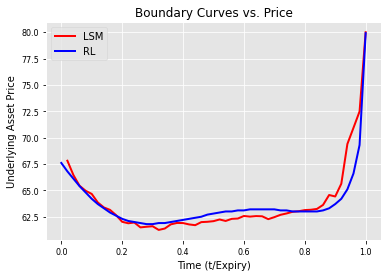

In [27]:
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use('ggplot')

# Plotting the data as a line with thicker lines
plt.plot(lsm_bound_x, lsm_bound_y, color='red', label='LSM', linewidth=2)
plt.plot(lspi_x, lspi_y, color='blue', label='RL', linewidth=2)
#plt.plot(bin_bound_x, bin_bound_y, color='green', label='BOPM', linewidth=2)

# Adding labels and title with smaller font size
plt.xlabel('Time (t/Expiry)', fontsize=10, color='black')
plt.ylabel('Underlying Asset Price', fontsize=10, color='black')
plt.title('Boundary Curves vs. Price', fontsize=12)

# Adding legend with smaller font size
plt.legend(fontsize=10)

# Set the x and y-axis tick label font size and color
plt.tick_params(axis='x', labelsize=8, colors='black')
plt.tick_params(axis='y', labelsize=8, colors='black')
plt.savefig('../MDPI/Figs/boundarygarch.png', dpi=300)


In [26]:
print("LSM Price:", garch_lsm_opprice)
print("RL Price", option_price_rl)


LSM Price: 10.542254921604655

RL Price 10.697283085948616

## Freqncy of GARCH Model - Bar Chart

In [ ]:
len(garch_lsm_stop_times)

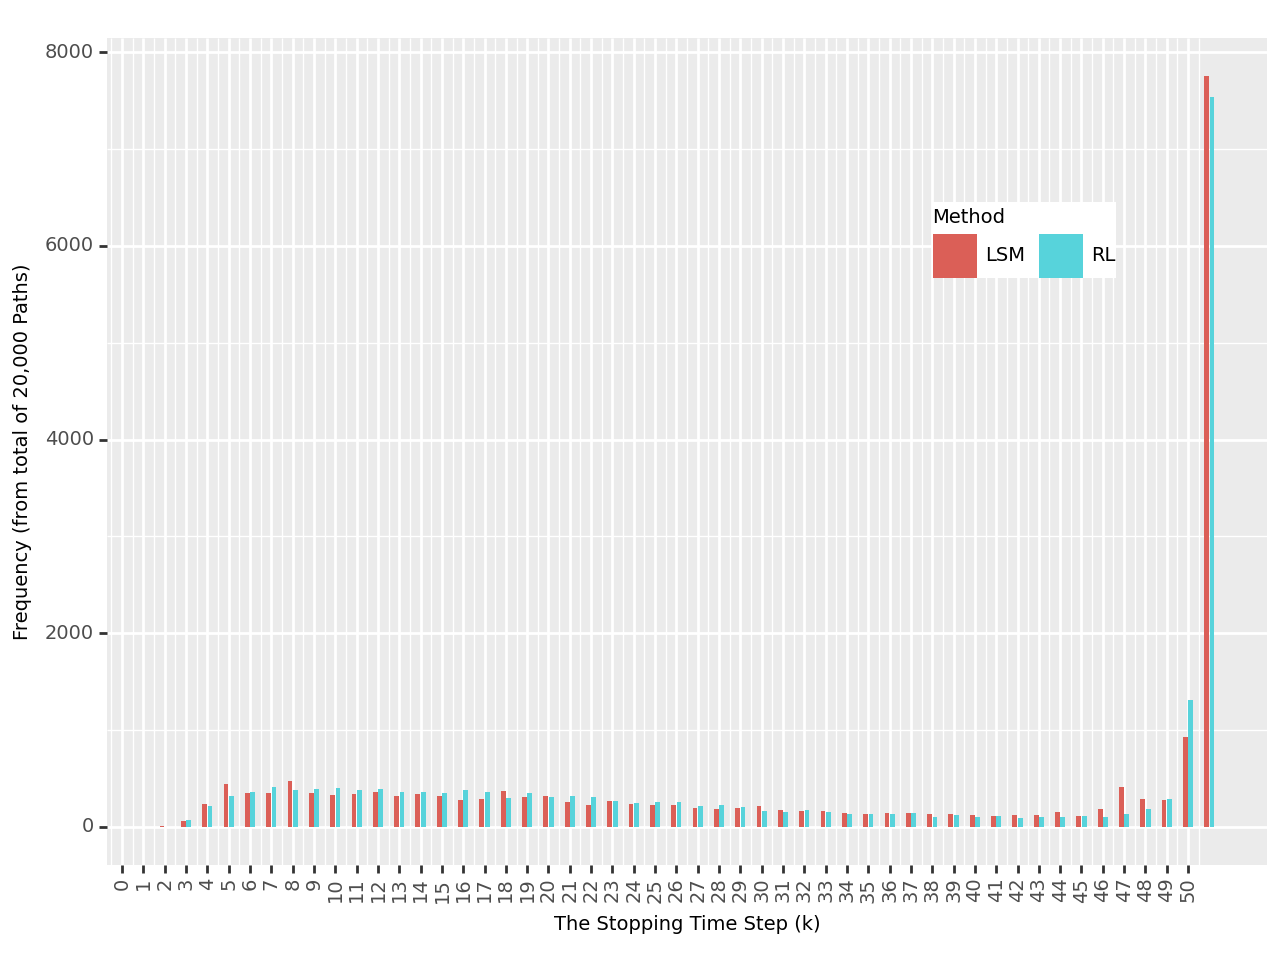

<Figure Size: (640 x 480)>

In [29]:
chart1_dataset1 = pd.DataFrame({"RL":stoptime_rl,
                                "LSM":garch_lsm_stop_times})


chart_1_dataset_melted1 = pd.melt(chart1_dataset1, value_vars=["RL", "LSM"],
                                                            var_name="Method",
                                                            value_name="stoptime")

#chart_1_dataset_melted1
#from plotnine import ggplot, labs, aes, scale_x_continuous, theme, geom_bar, position_dodge,geom_histogram
from plotnine import *

xx=(ggplot(chart_1_dataset_melted1, aes(x = "stoptime", fill = "Method")) + 
  geom_histogram(position="dodge2", binwidth = 0.5 , center = 0) +
  scale_x_continuous(breaks=range(0, 51, 1)) +
  labs(y='Frequency (from total of 20,000 Paths)', x="The Stopping Time Step (k)") +
  #scale_fill_manual(legend_title,values=c("orange","red")) +
theme(legend_position= (0.8, 0.75),
      axis_text_x=element_text(angle=90),
      text = element_text(size = 7))) 
      #ggtitle("S0 = 36, Strike Price = 40, Volatility = 0.2"))
xx

#ggsave(self=xx, filename='../MDPI/Figs/freq_garch.png', dpi = 300)


## How RL Moves in GARCH

[ 178.61365299 -128.13544968  230.35919956 -209.59068092  191.95060342
  -35.0940574  -100.13561299 -115.7262572   169.75619472   -2.46851125
  -46.64317889    0.42266263]

[ 92.19497199  30.19994187  53.61468213  -8.75929839  36.69801619
  23.30189782 -79.87605125 -97.78586107 100.60695896  49.23631889
 -56.28073191   1.76650944]

[ 47.01485331  47.06852895  33.02317244  13.81979266  17.16209417
  28.13450662 -34.71797001 -67.60292289  34.23443644  72.33131034
 -52.10947282   1.95339854]

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]

[ 178.61365299 -128.13544968  230.35919956 -209.59068092  191.95060342
  -35.0940574  -100.13561299 -115.7262572   169.75619472   -2.46851125
  -46.64317889    0.42266263]

[ 92.19497199  30.19994187  53.61468213  -8.75929839  36.69801619
  23.30189782 -79.87605125 -97.78586107 100.60695896  49.23631889
 -56.28073191   1.76650944]

[ 47.01485331  47.06852895  33.02317244  13.81979266  17.16209417
  28.13450662 -34.71797001 -67.60292289  34.23443644  72.33131034
 -52.10947282   1.95339854]

{0: 9.421792394983761, 1: 10.631426685131627, 2: 10.750134554986712, 3: 10.666179371011749}

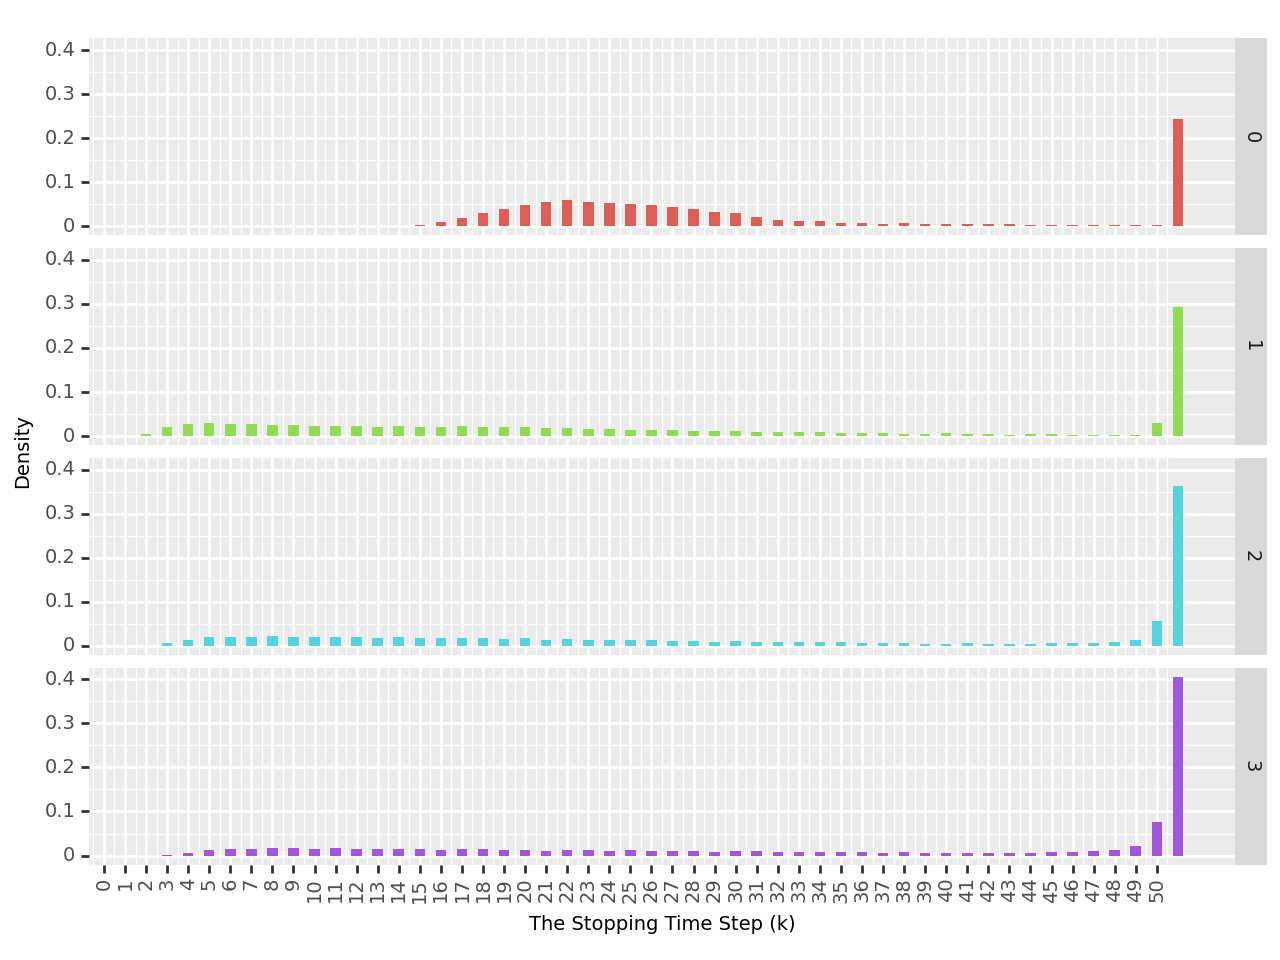

In [30]:
from RL_moves_GARCH import OptionPricing_RL_move_GARCH

In [31]:
option_pricing_rl_move = OptionPricing_RL_move_GARCH(num_scoring_paths_val=10000, 
                                               num_training_paths_lspi_val=5000)

#price_ite, decision_ite = option_pricing_rl_move.run()

In [32]:
price_ite, decision_ite = option_pricing_rl_move.run()

[ 1.19780171e+03 -2.65009269e+03  2.61275087e+03 -2.11931340e+03
  1.24550736e+03 -3.24003972e+02  3.30243151e+02 -3.09389391e+02
  9.05704081e+01  1.27509032e+02 -8.66684758e+01  3.77737150e-01]

[ 484.93656824 -933.45467865  963.90267664 -748.04605308  454.89260129
  -96.75803202   78.1851995  -170.83880553   80.29354537   85.75753649
  -66.3237618     1.72054571]

[ 298.83681941 -574.75113358  619.63585776 -462.68820705  287.09194861
  -50.16021995   68.0274049  -111.5071656    20.78886898   90.50932364
  -55.21631313    1.89967465]

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]

[ 1.19780171e+03 -2.65009269e+03  2.61275087e+03 -2.11931340e+03
  1.24550736e+03 -3.24003972e+02  3.30243151e+02 -3.09389391e+02
  9.05704081e+01  1.27509032e+02 -8.66684758e+01  3.77737150e-01]

[ 484.93656824 -933.45467865  963.90267664 -748.04605308  454.89260129
  -96.75803202   78.1851995  -170.83880553   80.29354537   85.75753649
  -66.3237618     1.72054571]

[ 298.83681941 -574.75113358  619.63585776 -462.68820705  287.09194861
  -50.16021995   68.0274049  -111.5071656    20.78886898   90.50932364
  -55.21631313    1.89967465]

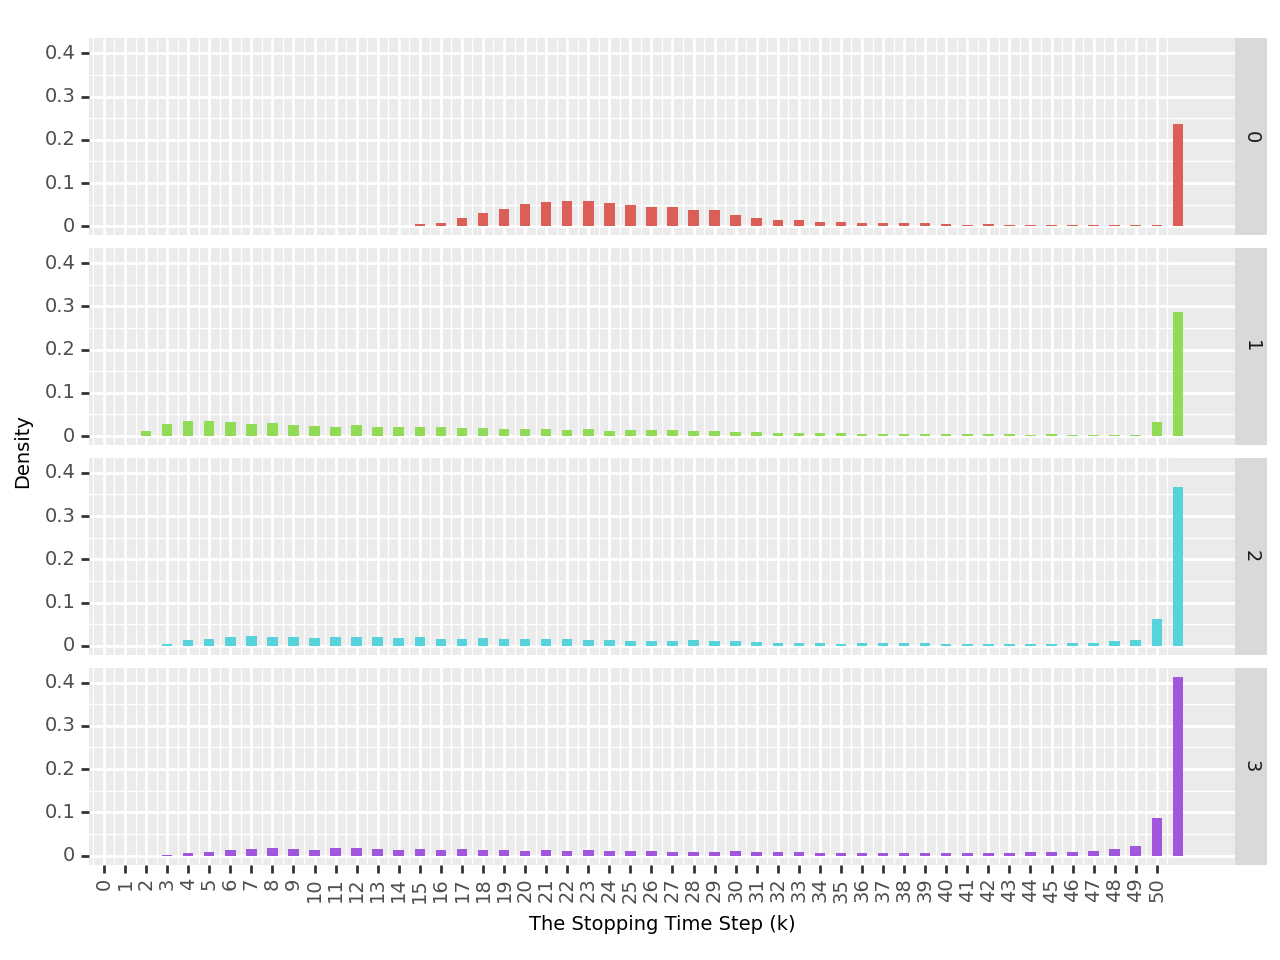

In [33]:
ite_plot =option_pricing_rl_move.clean_and_visualize_iteration_decision(decision_ite)
print(ite_plot)

In [ ]:
print(price_ite)

In [34]:
def clean_and_visualize_iteration_decision(stoptime_rl_iteration):
        df = pd.DataFrame(stoptime_rl_iteration).melt(var_name='IterationNumber', value_name='Values')
        df['Iter'] = pd.Categorical(df['IterationNumber'])

        g = (ggplot(df, aes(x='Values'))
             + geom_histogram(position="dodge2", binwidth=0.5, center=0,  show_legend=False,
                              color='black', fill='red')
             + scale_x_continuous(breaks=range(0, 51, 2))
             + facet_grid('Iter ~ .', scales='fixed') +
 #            + labs(title='Histogram of Exercise Decision Times, at each Iteration of Q-Learning') +
             labs(y='Frequency (from total of 20,000 Paths)', x="The Stopping Time Step (k)") +
                theme(axis_text_x=element_text(size=10, color="black",angle=90),
                text = element_text(size = 10,color='black'),
                axis_text_y=element_text(size=10, color="black")))
               # ggtitle("S0 = 36, Strike Price = 40, Volatility = 0.2"))
        return g

In [38]:
price_ite_garch_plot = clean_and_visualize_iteration_decision(decision_ite)

from plotnine import ggsave
ggsave(self=price_ite_garch_plot, filename="../MDPI/Figs/price_ite_garch_plot.png", dpi = 300)

/home/peyman/miniconda3/envs/RL_finance/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/peyman/miniconda3/envs/RL_finance/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../MDPI/Figs/price_ite_garch_plot.png


In [36]:
price_ite

{
    0: 9.568038296707389,
    1: 10.689990180539304,
    2: 10.736212726244023,
    3: 10.632004669635704
}